In [2]:
SELECT * FROM 'Raw_data_1Hr_2023_site_293_Alandur_Bus_Depot_Chennai_CPCB_1Hr.csv';

Timestamp  PM2.5 (µg/m³)  ...   BP (mmHg)  VWS (m/s)
0    2023-01-01 00:00:00+00:00      85.760000  ...  760.745000     -0.500
1    2023-01-01 01:00:00+00:00      91.595000  ...  760.197500     -0.500
2    2023-01-01 02:00:00+00:00      96.375000  ...  759.675000     -0.500
3    2023-01-01 03:00:00+00:00     107.095000  ...  759.432500     -0.500
4    2023-01-01 04:00:00+00:00     121.987500  ...  759.657500     -0.500
...                        ...            ...  ...         ...        ...
8755 2023-12-31 19:00:00+00:00      31.180000  ...  758.305000     -0.510
8756 2023-12-31 20:00:00+00:00      31.230000  ...  758.962500     -0.505
8757 2023-12-31 21:00:00+00:00      30.325000  ...  759.452500     -0.510
8758 2023-12-31 22:00:00+00:00      36.010000  ...  759.565000     -0.510
8759 2023-12-31 23:00:00+00:00      45.466667  ...  759.476667     -0.510

[8760 rows x 25 columns]

In [3]:
SELECT * FROM 'Raw_data_1Hr_2023_site_5107_Chhatrapati_Shivaji_Intl._Airport_(T2)_Mumbai_MPCB_1Hr.csv';

Timestamp  PM2.5 (µg/m³)  ...    BP (mmHg)  VWS (m/s)
0    2023-01-01 00:00:00+00:00        60.4600  ...  1014.015000       None
1    2023-01-01 01:00:00+00:00        63.7225  ...          NaN       None
2    2023-01-01 02:00:00+00:00        54.6325  ...  1012.910000       None
3    2023-01-01 03:00:00+00:00        50.6825  ...  1012.905000       None
4    2023-01-01 04:00:00+00:00        51.4050  ...  1012.977500       None
...                        ...            ...  ...          ...        ...
8755 2023-12-31 19:00:00+00:00        28.8625  ...  1011.347500       None
8756 2023-12-31 20:00:00+00:00        23.8125  ...  1012.012500       None
8757 2023-12-31 21:00:00+00:00        25.1550  ...  1012.385000       None
8758 2023-12-31 22:00:00+00:00        27.2275  ...  1012.720000       None
8759 2023-12-31 23:00:00+00:00        31.2300  ...  1012.646667       None

[8760 rows x 25 columns]

In [4]:
SELECT * FROM 'Raw_data_1Hr_2023_site_5024_Alipur_Delhi_DPCC_1Hr.csv';

Timestamp  PM2.5 (µg/m³)  ...  BP (mmHg)  VWS (m/s)
0    2023-01-01 00:00:00+00:00         134.00  ...    996.750       None
1    2023-01-01 01:00:00+00:00         112.00  ...    996.400       None
2    2023-01-01 02:00:00+00:00         103.00  ...    995.975       None
3    2023-01-01 03:00:00+00:00         114.00  ...    995.575       None
4    2023-01-01 04:00:00+00:00         136.00  ...    995.500       None
...                        ...            ...  ...        ...        ...
8755 2023-12-31 19:00:00+00:00         166.75  ...    973.800       None
8756 2023-12-31 20:00:00+00:00         174.50  ...    973.800       None
8757 2023-12-31 21:00:00+00:00         158.25  ...    973.775       None
8758 2023-12-31 22:00:00+00:00         139.25  ...    973.800       None
8759 2023-12-31 23:00:00+00:00         135.25  ...    973.800       None

[8760 rows x 25 columns]

In [62]:
# Importing Packages

import numpy as np
import pandas as pd

In [63]:
# Setting Path For Cities, reading and saving them in a dataframe

Chennai_df =  pd.read_csv("Raw_data_1Hr_2023_site_293_Alandur_Bus_Depot_Chennai_CPCB_1Hr.csv",parse_dates = ["Timestamp"])
Delhi_df = pd.read_csv("Raw_data_1Hr_2023_site_5024_Alipur_Delhi_DPCC_1Hr.csv",parse_dates = ["Timestamp"])
Mumbai_df = pd.read_csv("Raw_data_1Hr_2023_site_5107_Chhatrapati_Shivaji_Intl._Airport_(T2)_Mumbai_MPCB_1Hr.csv",parse_dates = ["Timestamp"])

In [64]:
# Setting Timestamp for all cities

Chennai_df["Timestamp"] = pd.to_datetime(Chennai_df["Timestamp"])
Delhi_df["Timestamp"] = pd.to_datetime(Delhi_df["Timestamp"])
Mumbai_df["Timestamp"] = pd.to_datetime(Mumbai_df["Timestamp"])

The AQI calculation uses 7 measures: **PM2.5, PM10, SO2, NOx, NH3, CO and O3**.
- For **PM2.5, PM10, SO2, NOx and NH3** the average value in last 24-hrs is used with the condition of having at least 16 values.
- For **CO and O3** the maximum value in last 8-hrs is used.
- Each measure is converted into a Sub-Index based on pre-defined groups.
- Sometimes measures are not available due to lack of measuring or lack of required data points.
- Final AQI is the maximum Sub-Index with the condition that at least one of PM2.5 and PM10 should be available and at least three out of the seven should be available.

## Calculating for Chennai

In [5]:
Chennai_df["PM10_24hr_avg"] = Chennai_df.groupby(pd.Grouper(key="Timestamp", freq="24H"))["PM10 (µg/m³)"].rolling(window=24, min_periods=16).mean().reset_index(drop=True)
Chennai_df["PM2.5_24hr_avg"] = Chennai_df.groupby(pd.Grouper(key="Timestamp", freq="24H"))["PM2.5 (µg/m³)"].rolling(window=24, min_periods=16).mean().reset_index(drop=True)
Chennai_df["SO2_24hr_avg"] = Chennai_df.groupby(pd.Grouper(key="Timestamp", freq="24H"))["SO2 (µg/m³)"].rolling(window=24, min_periods=16).mean().reset_index(drop=True)
Chennai_df["NOx_24hr_avg"] = Chennai_df.groupby(pd.Grouper(key="Timestamp", freq="24H"))["NOx (ppb)"].rolling(window=24, min_periods=16).mean().reset_index(drop=True)
Chennai_df["NH3_24hr_avg"] = Chennai_df.groupby(pd.Grouper(key="Timestamp", freq="24H"))["NH3 (µg/m³)"].rolling(window=24, min_periods=16).mean().reset_index(drop=True)
Chennai_df["CO_8hr_max"] = Chennai_df.groupby(pd.Grouper(key="Timestamp", freq="8H"))["CO (mg/m³)"].rolling(window=8, min_periods=1).max().reset_index(drop=True)
Chennai_df["O3_8hr_max"] = Chennai_df.groupby(pd.Grouper(key="Timestamp", freq="8H"))["Ozone (µg/m³)"].rolling(window=8, min_periods=1).max().reset_index(drop=True)

## Calculating for Delhi

In [6]:
Delhi_df["PM10_24hr_avg"] = Delhi_df.groupby(pd.Grouper(key="Timestamp", freq="24H"))["PM10 (µg/m³)"].rolling(window=24, min_periods=16).mean().reset_index(drop=True)
Delhi_df["PM2.5_24hr_avg"] = Delhi_df.groupby(pd.Grouper(key="Timestamp", freq="24H"))["PM2.5 (µg/m³)"].rolling(window=24, min_periods=16).mean().reset_index(drop=True)
Delhi_df["SO2_24hr_avg"] = Delhi_df.groupby(pd.Grouper(key="Timestamp", freq="24H"))["SO2 (µg/m³)"].rolling(window=24, min_periods=16).mean().reset_index(drop=True)
Delhi_df["NOx_24hr_avg"] = Delhi_df.groupby(pd.Grouper(key="Timestamp", freq="24H"))["NOx (ppb)"].rolling(window=24, min_periods=16).mean().reset_index(drop=True)
Delhi_df["NH3_24hr_avg"] = Delhi_df.groupby(pd.Grouper(key="Timestamp", freq="24H"))["NH3 (µg/m³)"].rolling(window=24, min_periods=16).mean().reset_index(drop=True)
Delhi_df["CO_8hr_max"] = Delhi_df.groupby(pd.Grouper(key="Timestamp", freq="8H"))["CO (mg/m³)"].rolling(window=8, min_periods=1).max().reset_index(drop=True)
Delhi_df["O3_8hr_max"] = Delhi_df.groupby(pd.Grouper(key="Timestamp", freq="8H"))["Ozone (µg/m³)"].rolling(window=8, min_periods=1).max().reset_index(drop=True)

## Calculating for Mumbai

In [7]:
Mumbai_df["PM10_24hr_avg"] = Mumbai_df.groupby(pd.Grouper(key="Timestamp", freq="24H"))["PM10 (µg/m³)"].rolling(window=24, min_periods=16).mean().reset_index(drop=True)
Mumbai_df["PM2.5_24hr_avg"] = Mumbai_df.groupby(pd.Grouper(key="Timestamp", freq="24H"))["PM2.5 (µg/m³)"].rolling(window=24, min_periods=16).mean().reset_index(drop=True)
Mumbai_df["SO2_24hr_avg"] = Mumbai_df.groupby(pd.Grouper(key="Timestamp", freq="24H"))["SO2 (µg/m³)"].rolling(window=24, min_periods=16).mean().reset_index(drop=True)
Mumbai_df["NOx_24hr_avg"] = Mumbai_df.groupby(pd.Grouper(key="Timestamp", freq="24H"))["NOx (ppb)"].rolling(window=24, min_periods=16).mean().reset_index(drop=True)
Mumbai_df["NH3_24hr_avg"] = Mumbai_df.groupby(pd.Grouper(key="Timestamp", freq="24H"))["NH3 (µg/m³)"].rolling(window=24, min_periods=16).mean().reset_index(drop=True)
Mumbai_df["CO_8hr_max"] = Mumbai_df.groupby(pd.Grouper(key="Timestamp", freq="8H"))["CO (mg/m³)"].rolling(window=8, min_periods=1).max().reset_index(drop=True)
Mumbai_df["O3_8hr_max"] = Mumbai_df.groupby(pd.Grouper(key="Timestamp", freq="8H"))["Ozone (µg/m³)"].rolling(window=8, min_periods=1).max().reset_index(drop=True)

## PM2.5 (Particulate Matter 2.5-micrometer)
PM2.5 is measured in ug / m3 (micrograms per cubic meter of air). The predefined groups are defined in the function below:

In [8]:
## PM2.5 Sub-Index calculation
def get_PM25_subindex(x):
    if x <= 30:
        return x * 50 / 30
    elif x <= 60:
        return 50 + (x - 30) * 50 / 30
    elif x <= 90:
        return 100 + (x - 60) * 100 / 30
    elif x <= 120:
        return 200 + (x - 90) * 100 / 30
    elif x <= 250:
        return 300 + (x - 120) * 100 / 130
    elif x > 250:
        return 400 + (x - 250) * 100 / 130
    else:
        return 0

Delhi_df["PM2.5_SubIndex"] = Delhi_df["PM2.5_24hr_avg"].apply(lambda x: get_PM25_subindex(x))
Chennai_df["PM2.5_SubIndex"] = Chennai_df["PM2.5_24hr_avg"].apply(lambda x: get_PM25_subindex(x))
Mumbai_df["PM2.5_SubIndex"] = Mumbai_df["PM2.5_24hr_avg"].apply(lambda x: get_PM25_subindex(x))

## PM10 (Particulate Matter 10-micrometer)
PM10 is measured in ug / m3 (micrograms per cubic meter of air). The predefined groups are defined in the function below:

In [9]:
## PM10 Sub-Index calculation
def get_PM10_subindex(x):
    if x <= 50:
        return x
    elif x <= 100:
        return x
    elif x <= 250:
        return 100 + (x - 100) * 100 / 150
    elif x <= 350:
        return 200 + (x - 250)
    elif x <= 430:
        return 300 + (x - 350) * 100 / 80
    elif x > 430:
        return 400 + (x - 430) * 100 / 80
    else:
        return 0

Delhi_df["PM10_SubIndex"] = Delhi_df["PM10_24hr_avg"].apply(lambda x: get_PM10_subindex(x))
Chennai_df["PM10_SubIndex"] = Chennai_df["PM10_24hr_avg"].apply(lambda x: get_PM10_subindex(x))
Mumbai_df["PM10_SubIndex"] = Mumbai_df["PM10_24hr_avg"].apply(lambda x: get_PM10_subindex(x))

## SO2 (Sulphur Dioxide)
SO2 is measured in ug / m3 (micrograms per cubic meter of air). The predefined groups are defined in the function below:

In [10]:
## SO2 Sub-Index calculation
def get_SO2_subindex(x):
    if x <= 40:
        return x * 50 / 40
    elif x <= 80:
        return 50 + (x - 40) * 50 / 40
    elif x <= 380:
        return 100 + (x - 80) * 100 / 300
    elif x <= 800:
        return 200 + (x - 380) * 100 / 420
    elif x <= 1600:
        return 300 + (x - 800) * 100 / 800
    elif x > 1600:
        return 400 + (x - 1600) * 100 / 800
    else:
        return 0

Delhi_df["SO2_SubIndex"] = Delhi_df["SO2_24hr_avg"].apply(lambda x: get_SO2_subindex(x))
Chennai_df["SO2_SubIndex"] = Chennai_df["SO2_24hr_avg"].apply(lambda x: get_SO2_subindex(x))
Mumbai_df["SO2_SubIndex"] = Mumbai_df["SO2_24hr_avg"].apply(lambda x: get_SO2_subindex(x))

## NOx (Any Nitric x-oxide)
NOx is measured in ppb (parts per billion). The predefined groups are defined in the function below:

In [11]:
## NOx Sub-Index calculation
def get_NOx_subindex(x):
    if x <= 40:
        return x * 50 / 40
    elif x <= 80:
        return 50 + (x - 40) * 50 / 40
    elif x <= 180:
        return 100 + (x - 80) * 100 / 100
    elif x <= 280:
        return 200 + (x - 180) * 100 / 100
    elif x <= 400:
        return 300 + (x - 280) * 100 / 120
    elif x > 400:
        return 400 + (x - 400) * 100 / 120
    else:
        return 0

Delhi_df["NOx_SubIndex"] = Delhi_df["NOx_24hr_avg"].apply(lambda x: get_NOx_subindex(x))
Chennai_df["NOx_SubIndex"] = Chennai_df["NOx_24hr_avg"].apply(lambda x: get_NOx_subindex(x))
Mumbai_df["NOx_SubIndex"] = Mumbai_df["NOx_24hr_avg"].apply(lambda x: get_NOx_subindex(x))

## NH3 (Ammonia)
NH3 is measured in ug / m3 (micrograms per cubic meter of air). The predefined groups are defined in the function below:

In [12]:
## NH3 Sub-Index calculation
def get_NH3_subindex(x):
    if x <= 200:
        return x * 50 / 200
    elif x <= 400:
        return 50 + (x - 200) * 50 / 200
    elif x <= 800:
        return 100 + (x - 400) * 100 / 400
    elif x <= 1200:
        return 200 + (x - 800) * 100 / 400
    elif x <= 1800:
        return 300 + (x - 1200) * 100 / 600
    elif x > 1800:
        return 400 + (x - 1800) * 100 / 600
    else:
        return 0

Delhi_df["NH3_SubIndex"] = Delhi_df["NH3_24hr_avg"].apply(lambda x: get_NH3_subindex(x))
Chennai_df["NH3_SubIndex"] = Chennai_df["NH3_24hr_avg"].apply(lambda x: get_NH3_subindex(x))
Mumbai_df["NH3_SubIndex"] = Mumbai_df["NH3_24hr_avg"].apply(lambda x: get_NH3_subindex(x))

## CO (Carbon Monoxide)
CO is measured in mg / m3 (milligrams per cubic meter of air). The predefined groups are defined in the function below:

In [13]:
## CO Sub-Index calculation
def get_CO_subindex(x):
    if x <= 1:
        return x * 50 / 1
    elif x <= 2:
        return 50 + (x - 1) * 50 / 1
    elif x <= 10:
        return 100 + (x - 2) * 100 / 8
    elif x <= 17:
        return 200 + (x - 10) * 100 / 7
    elif x <= 34:
        return 300 + (x - 17) * 100 / 17
    elif x > 34:
        return 400 + (x - 34) * 100 / 17
    else:
        return 0

Delhi_df["CO_SubIndex"] = Delhi_df["CO_8hr_max"].apply(lambda x: get_CO_subindex(x))
Chennai_df["CO_SubIndex"] = Chennai_df["CO_8hr_max"].apply(lambda x: get_CO_subindex(x))
Mumbai_df["CO_SubIndex"] = Mumbai_df["CO_8hr_max"].apply(lambda x: get_CO_subindex(x))

## O3 (Ozone or Trioxygen)
O3 is measured in ug / m3 (micrograms per cubic meter of air). The predefined groups are defined in the function below:

In [14]:
## O3 Sub-Index calculation
def get_O3_subindex(x):
    if x <= 50:
        return x * 50 / 50
    elif x <= 100:
        return 50 + (x - 50) * 50 / 50
    elif x <= 168:
        return 100 + (x - 100) * 100 / 68
    elif x <= 208:
        return 200 + (x - 168) * 100 / 40
    elif x <= 748:
        return 300 + (x - 208) * 100 / 539
    elif x > 748:
        return 400 + (x - 400) * 100 / 539
    else:
        return 0

Delhi_df["O3_SubIndex"] = Delhi_df["O3_8hr_max"].apply(lambda x: get_O3_subindex(x))
Chennai_df["O3_SubIndex"] = Chennai_df["O3_8hr_max"].apply(lambda x: get_O3_subindex(x))
Mumbai_df["O3_SubIndex"] = Mumbai_df["O3_8hr_max"].apply(lambda x: get_O3_subindex(x))

## AQI
The final AQI is the maximum Sub-Index among the available sub-indices with the condition that at least one of PM2.5 and PM10 should be available and at least three out of the seven should be available.

There is no theoretical upper value of AQI but its rare to find values over 1000.

The pre-defined buckets of AQI are as follows:
![AQI](AQI.png)


In [15]:
## AQI bucketing
def get_AQI_bucket(x):
    if x <= 50:
        return "Good"
    elif x <= 100:
        return "Satisfactory"
    elif x <= 200:
        return "Moderate"
    elif x <= 300:
        return "Poor"
    elif x <= 400:
        return "Very Poor"
    elif x > 400:
        return "Severe"
    else:
        return np.NaN

In [16]:
Delhi_df["Checks"] = (Delhi_df["PM2.5_SubIndex"] > 0).astype(int) + \
                (Delhi_df["PM10_SubIndex"] > 0).astype(int) + \
                (Delhi_df["SO2_SubIndex"] > 0).astype(int) + \
                (Delhi_df["NOx_SubIndex"] > 0).astype(int) + \
                (Delhi_df["NH3_SubIndex"] > 0).astype(int) + \
                (Delhi_df["CO_SubIndex"] > 0).astype(int) + \
                (Delhi_df["O3_SubIndex"] > 0).astype(int)

Delhi_df["AQI_calculated"] = round(Delhi_df[["PM2.5_SubIndex", "PM10_SubIndex", "SO2_SubIndex", "NOx_SubIndex",
                                 "NH3_SubIndex", "CO_SubIndex", "O3_SubIndex"]].max(axis = 1))
Delhi_df.loc[Delhi_df["PM2.5_SubIndex"] + Delhi_df["PM10_SubIndex"] <= 0, "AQI_calculated"] = np.NaN
Delhi_df.loc[Delhi_df.Checks < 3, "AQI_calculated"] = np.NaN

Delhi_df["AQI_bucket_calculated"] = Delhi_df["AQI_calculated"].apply(lambda x: get_AQI_bucket(x))
Delhi_df[~Delhi_df.AQI_calculated.isna()].head(13)

Timestamp  PM2.5 (µg/m³)  ...  AQI_calculated  AQI_bucket_calculated
15 2023-01-01 15:00:00          90.00  ...           308.0              Very Poor
16 2023-01-01 16:00:00          72.00  ...           305.0              Very Poor
17 2023-01-01 17:00:00          74.00  ...           303.0              Very Poor
18 2023-01-01 18:00:00          80.00  ...           301.0              Very Poor
19 2023-01-01 19:00:00         132.00  ...           302.0              Very Poor
20 2023-01-01 20:00:00         219.00  ...           305.0              Very Poor
21 2023-01-01 21:00:00         210.00  ...           308.0              Very Poor
22 2023-01-01 22:00:00            NaN  ...           308.0              Very Poor
23 2023-01-01 23:00:00            NaN  ...           308.0              Very Poor
63 2023-01-03 15:00:00         239.00  ...           376.0              Very Poor
64 2023-01-03 16:00:00         221.00  ...           376.0              Very Poor
65 2023-01-03 17:00:00         199.25  ...           375.0              Very Poor
66 2023-01-03 18:00:00         197.00  ...           374.0              Very Poor

[13 rows x 42 columns]

In [17]:
Chennai_df["Checks"] = (Chennai_df["PM2.5_SubIndex"] > 0).astype(int) + \
                (Chennai_df["PM10_SubIndex"] > 0).astype(int) + \
                (Chennai_df["SO2_SubIndex"] > 0).astype(int) + \
                (Chennai_df["NOx_SubIndex"] > 0).astype(int) + \
                (Chennai_df["NH3_SubIndex"] > 0).astype(int) + \
                (Chennai_df["CO_SubIndex"] > 0).astype(int) + \
                (Chennai_df["O3_SubIndex"] > 0).astype(int)

Chennai_df["AQI_calculated"] = round(Chennai_df[["PM2.5_SubIndex", "PM10_SubIndex", "SO2_SubIndex", "NOx_SubIndex",
                                 "NH3_SubIndex", "CO_SubIndex", "O3_SubIndex"]].max(axis = 1))
Chennai_df.loc[Chennai_df["PM2.5_SubIndex"] + Chennai_df["PM10_SubIndex"] <= 0, "AQI_calculated"] = np.NaN
Chennai_df.loc[Chennai_df.Checks < 3, "AQI_calculated"] = np.NaN

Chennai_df["AQI_bucket_calculated"] = Chennai_df["AQI_calculated"].apply(lambda x: get_AQI_bucket(x))
Chennai_df[~Chennai_df.AQI_calculated.isna()].head(13)

Timestamp  PM2.5 (µg/m³)  ...  AQI_calculated  AQI_bucket_calculated
15 2023-01-01 15:00:00      50.720000  ...           226.0                   Poor
16 2023-01-01 16:00:00      49.230000  ...           216.0                   Poor
17 2023-01-01 17:00:00      43.420000  ...           207.0                   Poor
18 2023-01-01 18:00:00      39.742500  ...           198.0               Moderate
19 2023-01-01 19:00:00      39.802500  ...           189.0               Moderate
20 2023-01-01 20:00:00      40.432500  ...           182.0               Moderate
21 2023-01-01 21:00:00      41.090000  ...           175.0               Moderate
22 2023-01-01 22:00:00      45.960000  ...           170.0               Moderate
23 2023-01-01 23:00:00      50.446667  ...           166.0               Moderate
39 2023-01-02 15:00:00      50.005000  ...           140.0               Moderate
40 2023-01-02 16:00:00      47.082500  ...           135.0               Moderate
41 2023-01-02 17:00:00      44.695000  ...           131.0               Moderate
42 2023-01-02 18:00:00      40.395000  ...           126.0               Moderate

[13 rows x 42 columns]

In [18]:
Mumbai_df["Checks"] = (Mumbai_df["PM2.5_SubIndex"] > 0).astype(int) + \
                (Mumbai_df["PM10_SubIndex"] > 0).astype(int) + \
                (Mumbai_df["SO2_SubIndex"] > 0).astype(int) + \
                (Mumbai_df["NOx_SubIndex"] > 0).astype(int) + \
                (Mumbai_df["NH3_SubIndex"] > 0).astype(int) + \
                (Mumbai_df["CO_SubIndex"] > 0).astype(int) + \
                (Mumbai_df["O3_SubIndex"] > 0).astype(int)

Mumbai_df["AQI_calculated"] = round(Mumbai_df[["PM2.5_SubIndex", "PM10_SubIndex", "SO2_SubIndex", "NOx_SubIndex",
                                 "NH3_SubIndex", "CO_SubIndex", "O3_SubIndex"]].max(axis = 1))
Mumbai_df.loc[Mumbai_df["PM2.5_SubIndex"] + Mumbai_df["PM10_SubIndex"] <= 0, "AQI_calculated"] = np.NaN
Mumbai_df.loc[Mumbai_df.Checks < 3, "AQI_calculated"] = np.NaN

Mumbai_df["AQI_bucket_calculated"] = Mumbai_df["AQI_calculated"].apply(lambda x: get_AQI_bucket(x))
Mumbai_df[~Mumbai_df.AQI_calculated.isna()].head(13)

Timestamp  PM2.5 (µg/m³)  ...  AQI_calculated  AQI_bucket_calculated
15 2023-01-01 15:00:00        36.9100  ...            79.0           Satisfactory
16 2023-01-01 16:00:00        39.9100  ...           144.0               Moderate
17 2023-01-01 17:00:00        41.8475  ...           145.0               Moderate
18 2023-01-01 18:00:00        38.4600  ...           144.0               Moderate
19 2023-01-01 19:00:00        41.3650  ...           143.0               Moderate
20 2023-01-01 20:00:00        43.4600  ...           142.0               Moderate
21 2023-01-01 21:00:00        49.3275  ...           142.0               Moderate
22 2023-01-01 22:00:00        64.9225  ...           144.0               Moderate
23 2023-01-01 23:00:00        70.9600  ...           146.0               Moderate
39 2023-01-02 15:00:00        39.5350  ...           116.0               Moderate
40 2023-01-02 16:00:00        48.0000  ...           178.0               Moderate
41 2023-01-02 17:00:00        48.4550  ...           177.0               Moderate
42 2023-01-02 18:00:00        50.5950  ...           177.0               Moderate

[13 rows x 42 columns]

# Saving these Dataframes in Excel files

In [61]:
Delhi_df.to_excel('Delhi_Final.xlsx', index=False)
Chennai_df.to_excel('Chennai_Final.xlsx', index=False)
Mumbai_df.to_excel('Mumbai_Final.xlsx', index=False)

# Visualization Reports of Chennai 

In [33]:
import matplotlib.pyplot as plt
import seaborn as sns

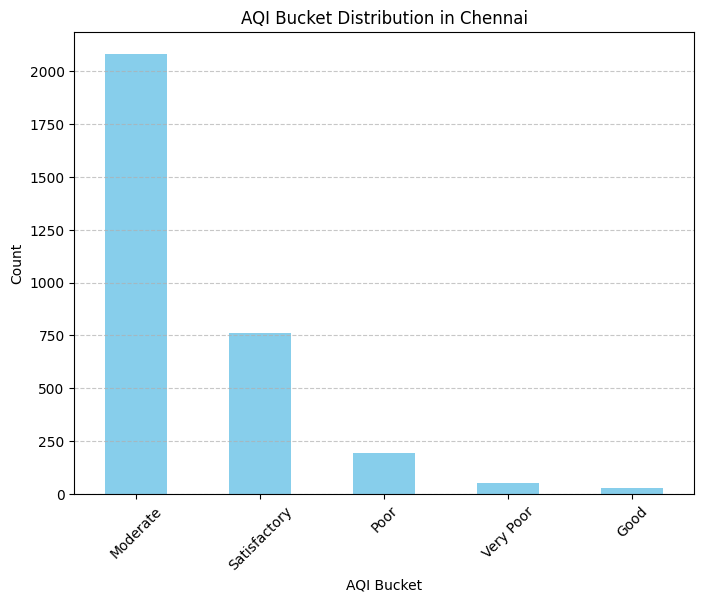

In [55]:
# Get the data
data = Chennai_df[~Chennai_df.AQI_calculated.isna()].AQI_bucket_calculated.value_counts()

# AQI Bucket Distribution in Chennai
plt.figure(figsize=(8, 6))
data.plot(kind='bar', color='skyblue')
plt.title('AQI Bucket Distribution in Chennai')
plt.xlabel('AQI Bucket')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

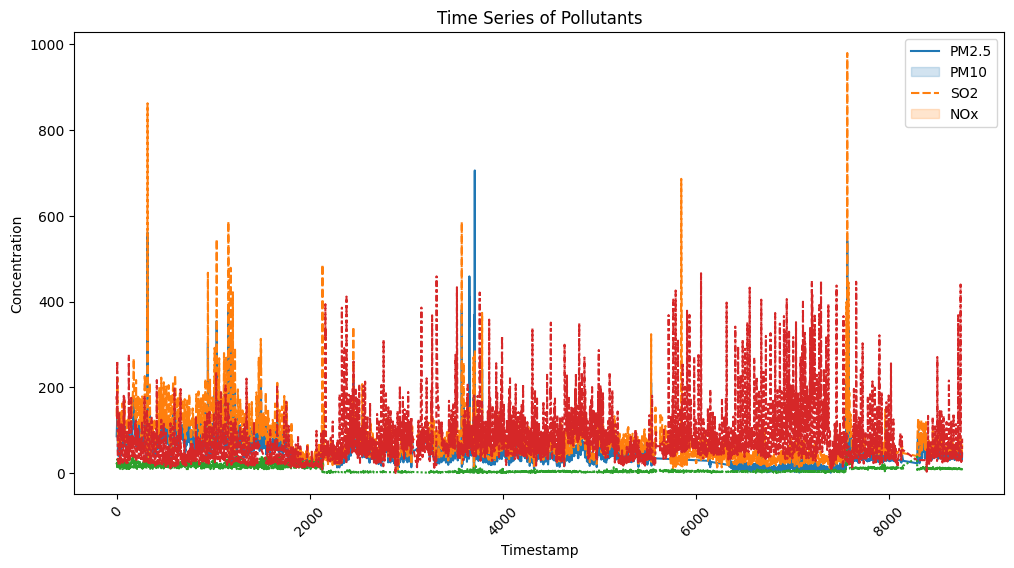

In [69]:
# Time series plot for pollutants
plt.figure(figsize=(12, 6))
sns.lineplot(data=Chennai_df[['PM2.5 (µg/m³)', 'PM10 (µg/m³)', 'SO2 (µg/m³)', 'NOx (ppb)']])
plt.title('Time Series of Pollutants')
plt.xlabel('Timestamp')
plt.ylabel('Concentration')
plt.legend(['PM2.5', 'PM10', 'SO2', 'NOx'])
plt.xticks(rotation=45)
plt.show()


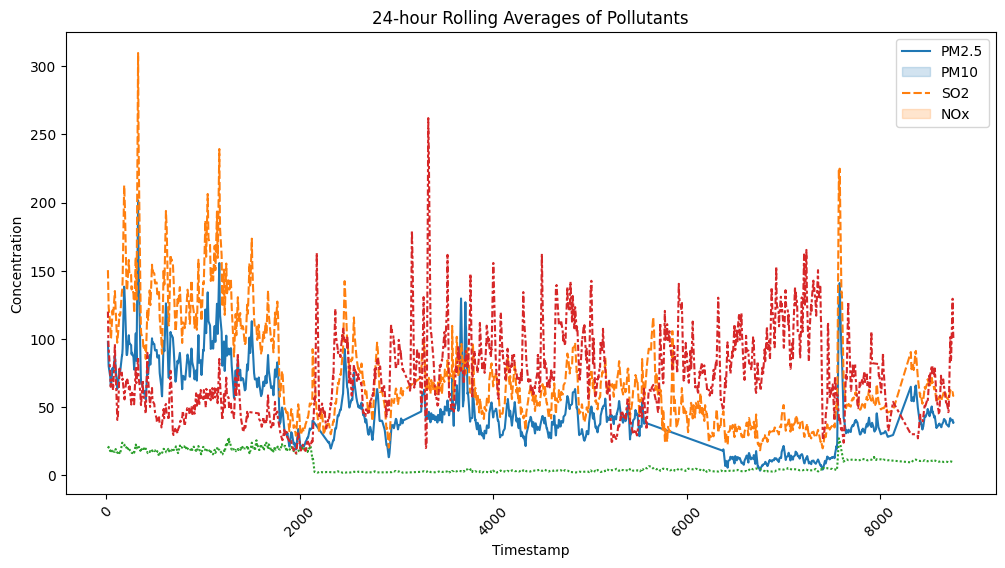

In [26]:
# Rolling averages plot
plt.figure(figsize=(12, 6))
sns.lineplot(data=Chennai_df[['PM2.5_24hr_avg', 'PM10_24hr_avg', 'SO2_24hr_avg', 'NOx_24hr_avg']])
plt.title('24-hour Rolling Averages of Pollutants')
plt.xlabel('Timestamp')
plt.ylabel('Concentration')
plt.legend(['PM2.5', 'PM10', 'SO2', 'NOx'])
plt.xticks(rotation=45)
plt.show()

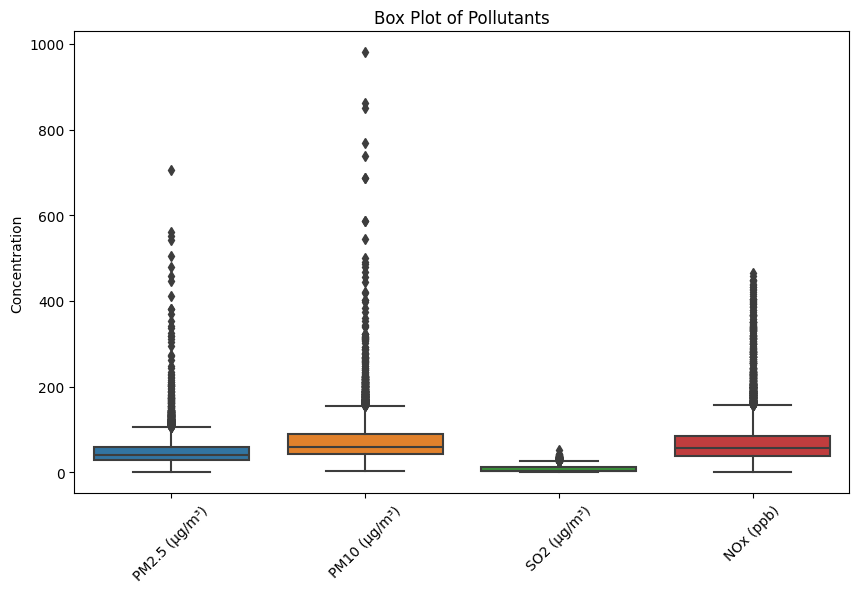

In [28]:
# Box plot for pollutants
pollutants = ['PM2.5 (µg/m³)', 'PM10 (µg/m³)', 'SO2 (µg/m³)', 'NOx (ppb)']
plt.figure(figsize=(10, 6))
sns.boxplot(data=Chennai_df[pollutants])
plt.title('Box Plot of Pollutants')
plt.ylabel('Concentration')
plt.xticks(rotation=45)
plt.show()

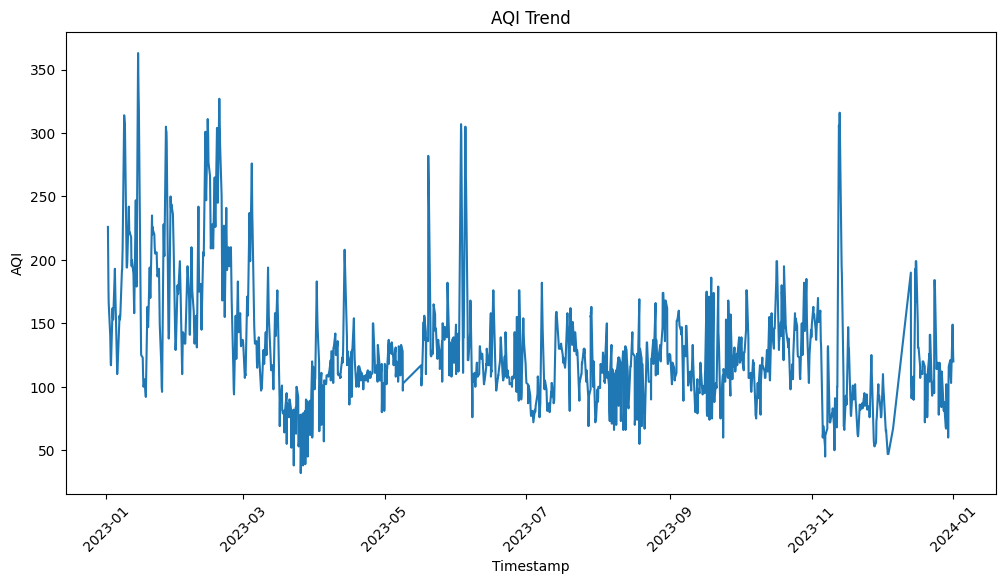

In [29]:
# AQI trend
plt.figure(figsize=(12, 6))
sns.lineplot(x='Timestamp', y='AQI_calculated', data=Chennai_df)
plt.title('AQI Trend')
plt.xlabel('Timestamp')
plt.ylabel('AQI')
plt.xticks(rotation=45)
plt.show()

# Visualization Reports of Delhi

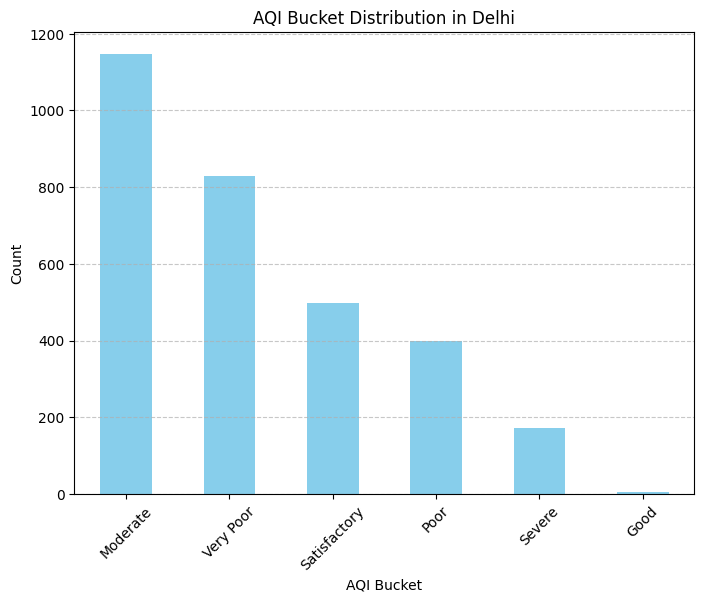

In [51]:
# Get the data
data = Delhi_df[~Delhi_df.AQI_calculated.isna()].AQI_bucket_calculated.value_counts()

# AQI Bucket Distribution in Delhi
plt.figure(figsize=(8, 6))
data.plot(kind='bar', color='skyblue')
plt.title('AQI Bucket Distribution in Delhi')
plt.xlabel('AQI Bucket')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

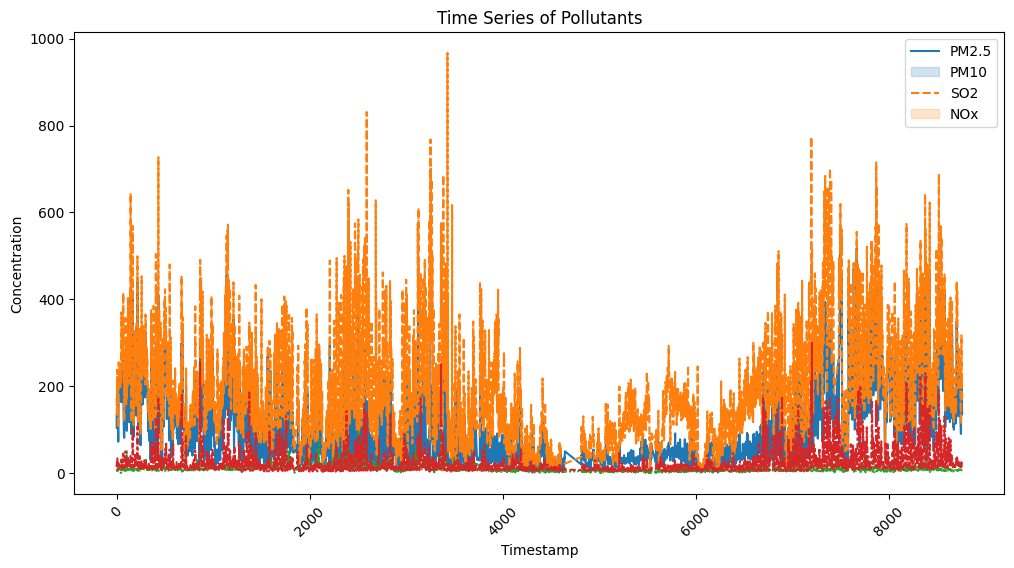

In [34]:
# Time series plot for pollutants
plt.figure(figsize=(12, 6))
sns.lineplot(data=Delhi_df[['PM2.5 (µg/m³)', 'PM10 (µg/m³)', 'SO2 (µg/m³)', 'NOx (ppb)']])
plt.title('Time Series of Pollutants')
plt.xlabel('Timestamp')
plt.ylabel('Concentration')
plt.legend(['PM2.5', 'PM10', 'SO2', 'NOx'])
plt.xticks(rotation=45)
plt.show()

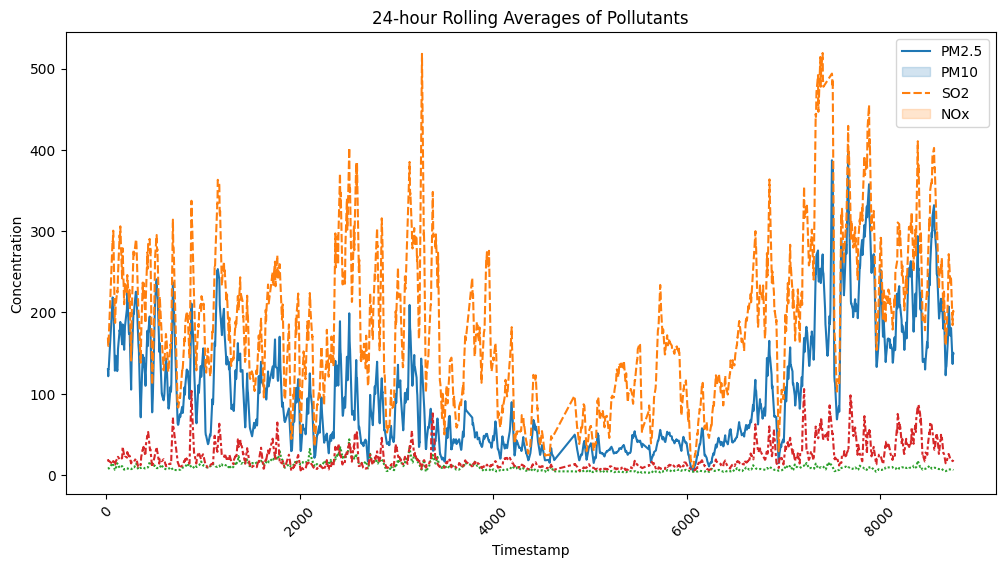

In [38]:
# Rolling averages plot
plt.figure(figsize=(12, 6))
sns.lineplot(data=Delhi_df[['PM2.5_24hr_avg', 'PM10_24hr_avg', 'SO2_24hr_avg', 'NOx_24hr_avg']])
plt.title('24-hour Rolling Averages of Pollutants')
plt.xlabel('Timestamp')
plt.ylabel('Concentration')
plt.legend(['PM2.5', 'PM10', 'SO2', 'NOx'])
plt.xticks(rotation=45)
plt.show()

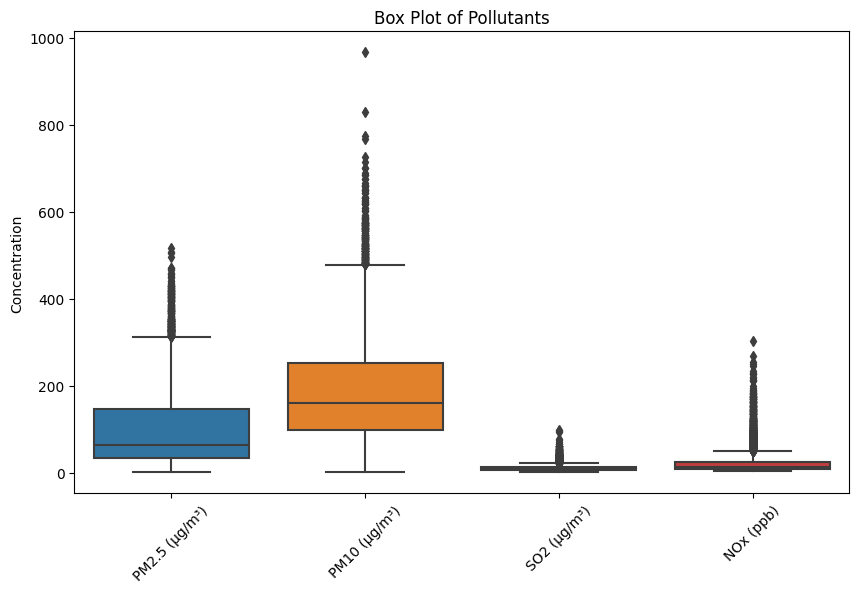

In [39]:
# Box plot for pollutants
pollutants = ['PM2.5 (µg/m³)', 'PM10 (µg/m³)', 'SO2 (µg/m³)', 'NOx (ppb)']
plt.figure(figsize=(10, 6))
sns.boxplot(data=Delhi_df[pollutants])
plt.title('Box Plot of Pollutants')
plt.ylabel('Concentration')
plt.xticks(rotation=45)
plt.show()

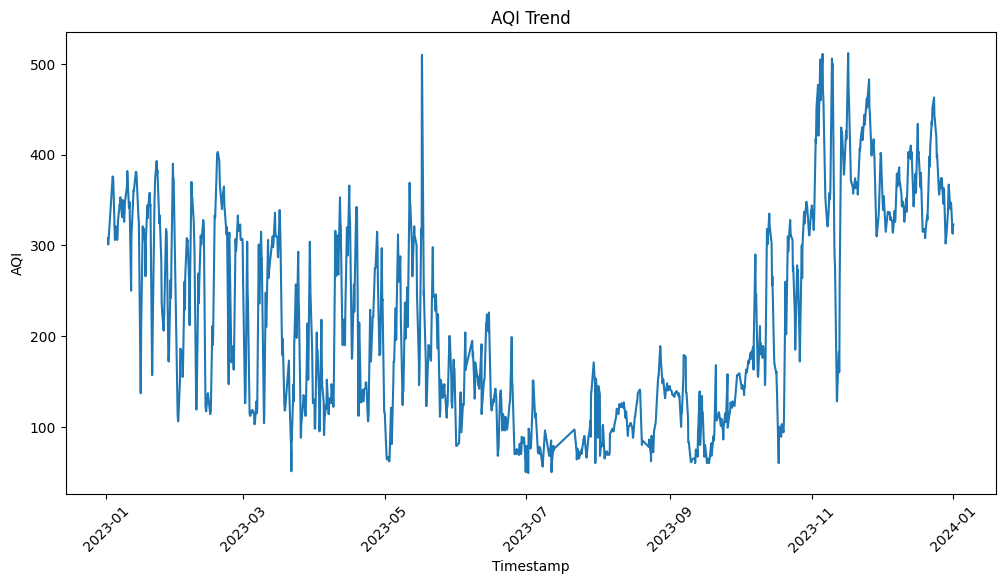

In [40]:
# AQI trend
plt.figure(figsize=(12, 6))
sns.lineplot(x='Timestamp', y='AQI_calculated', data=Delhi_df)
plt.title('AQI Trend')
plt.xlabel('Timestamp')
plt.ylabel('AQI')
plt.xticks(rotation=45)
plt.show()

# Visualization Reports of Mumbai

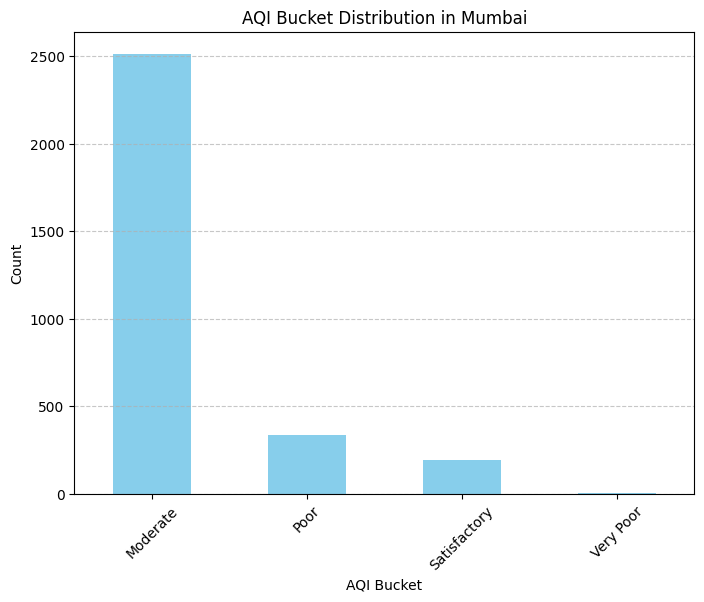

In [56]:
# Get the data
data = Mumbai_df[~Mumbai_df.AQI_calculated.isna()].AQI_bucket_calculated.value_counts()

# AQI Bucket Distribution in Mumbai
plt.figure(figsize=(8, 6))
data.plot(kind='bar', color='skyblue')
plt.title('AQI Bucket Distribution in Mumbai')
plt.xlabel('AQI Bucket')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

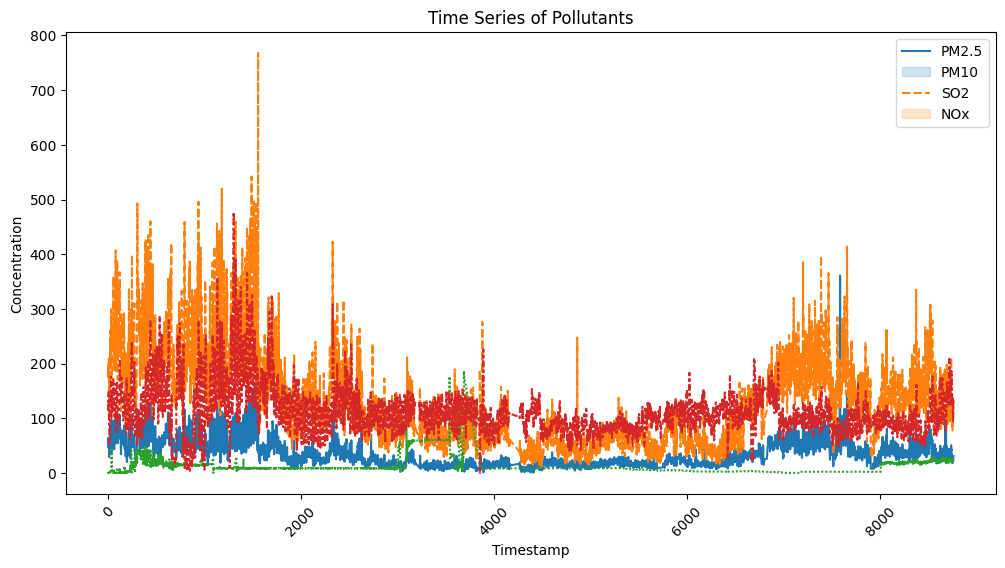

In [41]:
# Time series plot for pollutants
plt.figure(figsize=(12, 6))
sns.lineplot(data=Mumbai_df[['PM2.5 (µg/m³)', 'PM10 (µg/m³)', 'SO2 (µg/m³)', 'NOx (ppb)']])
plt.title('Time Series of Pollutants')
plt.xlabel('Timestamp')
plt.ylabel('Concentration')
plt.legend(['PM2.5', 'PM10', 'SO2', 'NOx'])
plt.xticks(rotation=45)
plt.show()

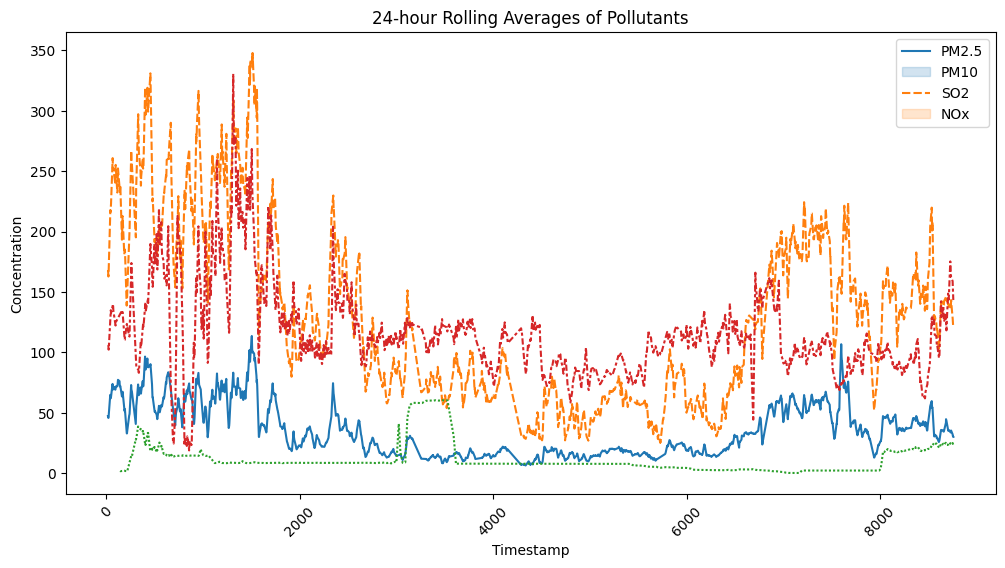

In [42]:
# Rolling averages plot
plt.figure(figsize=(12, 6))
sns.lineplot(data=Mumbai_df[['PM2.5_24hr_avg', 'PM10_24hr_avg', 'SO2_24hr_avg', 'NOx_24hr_avg']])
plt.title('24-hour Rolling Averages of Pollutants')
plt.xlabel('Timestamp')
plt.ylabel('Concentration')
plt.legend(['PM2.5', 'PM10', 'SO2', 'NOx'])
plt.xticks(rotation=45)
plt.show()

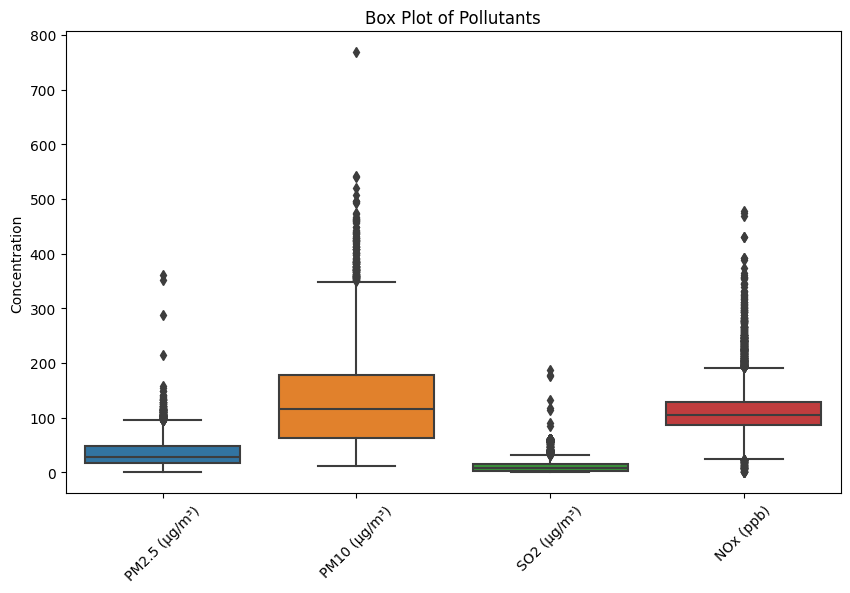

In [45]:
# Box plot for pollutants
pollutants = ['PM2.5 (µg/m³)', 'PM10 (µg/m³)', 'SO2 (µg/m³)', 'NOx (ppb)']
plt.figure(figsize=(10, 6))
sns.boxplot(data=Mumbai_df[pollutants])
plt.title('Box Plot of Pollutants')
plt.ylabel('Concentration')
plt.xticks(rotation=45)
plt.show()

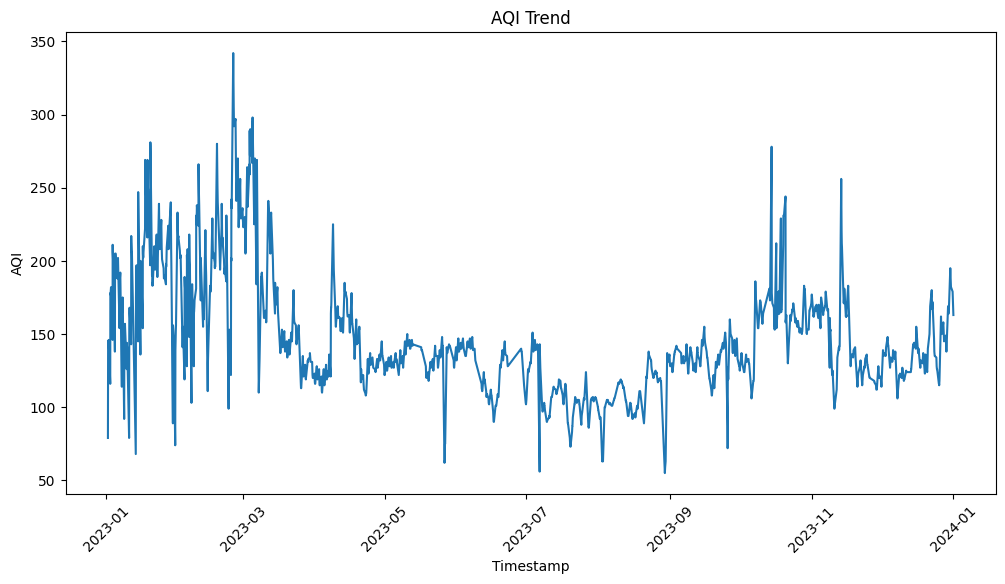

In [46]:
# AQI trend
plt.figure(figsize=(12, 6))
sns.lineplot(x='Timestamp', y='AQI_calculated', data=Mumbai_df)
plt.title('AQI Trend')
plt.xlabel('Timestamp')
plt.ylabel('AQI')
plt.xticks(rotation=45)
plt.show()

# Plotting AQI trends for all three cities

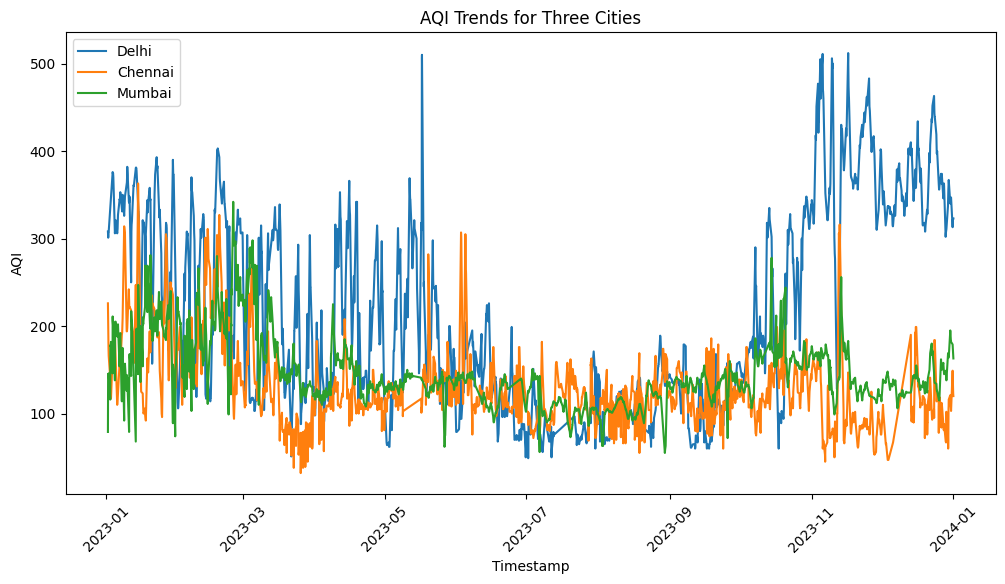

In [58]:
# Plotting AQI trends for all three cities
plt.figure(figsize=(12, 6))
sns.lineplot(x='Timestamp', y='AQI_calculated', data=Delhi_df, label='Delhi')
sns.lineplot(x='Timestamp', y='AQI_calculated', data=Chennai_df, label='Chennai')
sns.lineplot(x='Timestamp', y='AQI_calculated', data=Mumbai_df, label='Mumbai')
plt.title('AQI Trends for Three Cities')
plt.xlabel('Timestamp')
plt.ylabel('AQI')
plt.legend()
plt.xticks(rotation=45)
plt.show()